# 1.
The "standard error of the mean" (SEM) and the "standard deviation" (SD) of the original data show different things about the variability. The SD measures how much individual data points in a dataset vary from the average, showing how spread out the data is. On the other hand, the SEM is about the accuracy of the sample mean as an estimate of the population mean. It tells you how much the means of different samples (if you kept sampling) would vary. While SD focuses on data point variability, SEM focuses on how precise the average from a sample is likely to be.

# 2. 
To create a 95% confidence interval using the standard error of the mean (SEM), first, you need to calculate the average (mean) of your sample. Then, you take the SEM and multiply it by 1.96, which is a number used to create a 95% confidence level. After that, subtract the result from your sample mean to get the lower limit of the interval, and add the result to the sample mean to get the upper limit. This gives you a range where 95% of the possible sample means will likely fall, helping you estimate the true average of the whole population.

# 3. 
To create a 95% bootstrapped confidence interval using the bootstrapped means, you start by generating many bootstrap samples from your original dataset and calculating the mean for each sample. This gives you a distribution of bootstrapped means. Next, you sort these means in ascending order. To find the 95% confidence interval, you look for the lower and upper bounds by taking the 2.5th percentile and the 97.5th percentile of the sorted bootstrapped means. This method allows you to directly use the distribution of bootstrapped means to create the confidence interval, ensuring that it covers 95% of the bootstrapped sample means.

# 4.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def bootstrap_confidence_interval(data, num_bootstrap_samples=1000, confidence_level=0.95, statistic='mean'):
    """
    Function to calculate the bootstrap confidence interval for a given statistic.
    
    Parameters:
    - data: The sample data from which to generate bootstrap samples.
    - num_bootstrap_samples: The number of bootstrap samples to generate.
    - confidence_level: The desired confidence level for the interval (default is 0.95).
    - statistic: The statistic to compute ('mean' or 'median').
    
    Returns:
    - lower_bound: The lower bound of the confidence interval.
    - upper_bound: The upper bound of the confidence interval.
    - bootstrap_values: The values of the bootstrapped statistic.
    """
    bootstrap_values = []  # List to store bootstrap sample statistics
    n = len(data)  # Size of the original data
    
    for _ in range(num_bootstrap_samples):
        # Create a bootstrap sample by sampling with replacement
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        
        # Calculate the desired statistic (mean or median) of the bootstrap sample
        if statistic == 'mean':
            bootstrap_values.append(np.mean(bootstrap_sample))  # For mean
        elif statistic == 'median':
            bootstrap_values.append(np.median(bootstrap_sample))  # For median
        # You can add more conditions here for other statistics if needed

    # Calculate the lower and upper percentiles for the confidence interval
    lower_bound = np.percentile(bootstrap_values, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrap_values, (confidence_level + (1 - confidence_level) / 2) * 100)
    
    return lower_bound, upper_bound, bootstrap_values

# Example usage
data = [1, 2, 3, 4, 5]  # Sample data
mean_ci, _, bootstrap_means = bootstrap_confidence_interval(data, statistic='mean')  # Calculate 95% CI for the mean

print("95% Confidence Interval for the Mean:", mean_ci)

# To calculate the 95% bootstrap confidence interval for the population median,
# you can simply call the function again with statistic='median'.
median_ci, _, bootstrap_medians = bootstrap_confidence_interval(data, statistic='median')  # Calculate 95% CI for the median


print("95% Confidence Interval for the Median:", median_ci)


95% Confidence Interval for the Mean: 1.8
95% Confidence Interval for the Median: 1.0


## Chatbot Summary for 4. 

Here's a concise summary of the bootstrap confidence interval code for calculating the mean and median:

### Summary of Bootstrap Confidence Interval Code

1. **Purpose**: The code calculates a 95% bootstrap confidence interval for either the mean or the median of a given dataset, allowing for statistical inference without the assumption of normality.

2. **Function Definition**:
   - The function `bootstrap_confidence_interval` takes the following parameters:
     - `data`: The sample data for which the confidence interval is calculated.
     - `num_bootstrap_samples`: The number of bootstrap samples to generate (default is 1000).
     - `confidence_level`: The desired confidence level for the interval (default is 0.95).
     - `statistic`: The statistic to compute, which can be either `'mean'` or `'median'`.

3. **Bootstrap Sampling**:
   - Inside the function, a loop generates bootstrap samples by sampling with replacement from the original data.
   - Depending on the chosen statistic, it computes the mean or median of each bootstrap sample and stores these values.

4. **Confidence Interval Calculation**:
   - The function calculates the lower and upper bounds of the confidence interval by determining the appropriate percentiles of the bootstrap statistics.

5. **Visualization**:
   - The code includes optional plotting sections to visualize the distribution of the bootstrap means and medians along with their respective confidence intervals.

6. **Example Usage**:
   - The example provided shows how to call the function for both the mean and the median, demonstrating its flexibility to analyze different population parameters.

### Conclusion
This code provides a comprehensive and flexible approach to estimating confidence intervals using the bootstrap method, making it useful for analyzing various statistics beyond the mean, like the median, by simply modifying a parameter.<br>
Link: https://chatgpt.com/share/66ff3e16-2a54-8007-a9e9-94dcf6642774

# 5. 
Distinguishing between the population parameter and the sample statistic is important because they serve different roles in statistical analysis. The population parameter is the true value for the entire population, while the sample statistic is an estimate based on a subset of that population. Confidence intervals provide a range around the sample statistic, indicating where the true population parameter is likely to fall, which helps us understand the uncertainty of our estimate. This distinction clarifies that our sample statistic is just an approximation, and the confidence interval reflects our confidence in its accuracy.

# 6.
### 1. 
Bootstrapping is a statistical method that allows us to estimate the properties of a population by using a small sample of data. The process starts by taking your original sample and repeatedly creating new "bootstrap samples" from it. This is done by randomly selecting observations from the original sample with replacement, meaning that some observations can appear more than once in each bootstrap sample. For each of these bootstrap samples, you calculate a statistic of interest, like the mean or median. By repeating this process many times—often thousands—you generate a distribution of the calculated statistics, which helps you understand how much variability there is and how confident you can be in your sample estimate.
### 2. 
The main purpose of bootstrapping is to help us quantify the uncertainty associated with our sample statistics and to make inferences about the population from which the sample was drawn. Since we typically cannot measure an entire population, bootstrapping provides a way to create confidence intervals and assess the stability of our estimates. By simulating the process of drawing samples from the population, bootstrapping allows us to understand the distribution of our statistics and provides insights into how likely it is that our sample estimate reflects the true population parameter. Essentially, it gives us a way to gauge the reliability of our conclusions based on limited data.
### 3. 
If you have a hypothesized guess about the average of a population and a sample of size 𝑛, you can use bootstrapping to see if your guess is reasonable. First, you would generate many bootstrap samples from your original data by sampling with replacement and calculate the average for each of these samples. This process creates a distribution of averages that reflects the variability of the sample means. You can then check where your guessed average falls within this distribution. If your guess is located within the range of most of the bootstrap averages, it indicates that your guess is plausible. However, if your guess is far outside this range, it suggests that your estimate may not accurately represent the true population average.

# 7.
If the confidence interval includes zero, it means the drug might not actually do anything overall, even if the average result from our sample isn't zero. That’s why we say we "fail to reject" the idea that the drug doesn't work on average. <br>

If the confidence interval doesn't include zero, it means the drug likely does have an effect on average, and we can reject the idea that the drug does nothing. When we say "the drug is on average not doing anything," we're talking about the overall effect across all people, not about what happens to every single person.<br>

To reach the opposite conclusion, where we reject the null hypothesis, the confidence interval for the average effect of the drug must not include zero. This would mean that zero is not a possible value for the true average effect of the drug in the population. If the confidence interval shows that the average effect is clearly different from zero, we can confidently say the drug is doing something on average. So, if the range of possible average effects is all positive or all negative (and doesn’t include zero), we reject the idea that the drug has no effect, and conclude that the drug likely does have an impact.









# 8.
### Problem Introduction
Reject the null hypothesis in this context means that the vaccine likely improves health scores. This will happen if there is a significant difference between the initial and final health scores of the patients who received the vaccine.

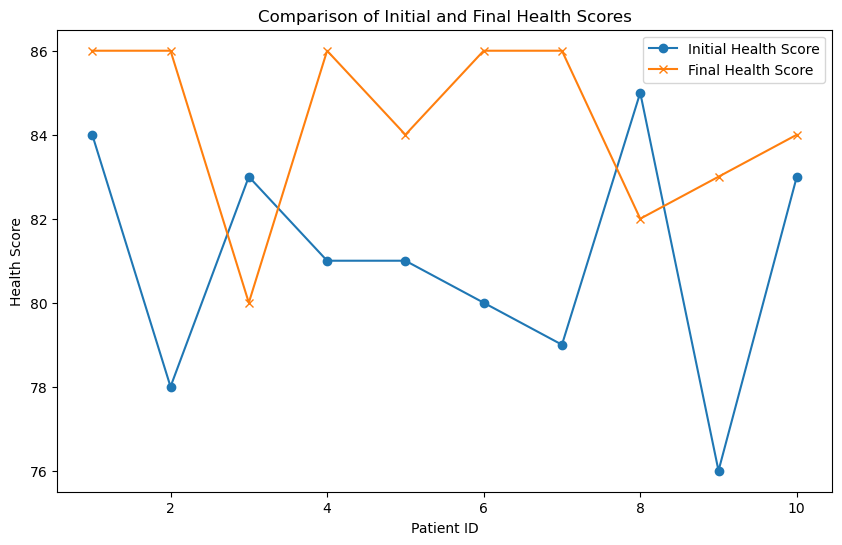

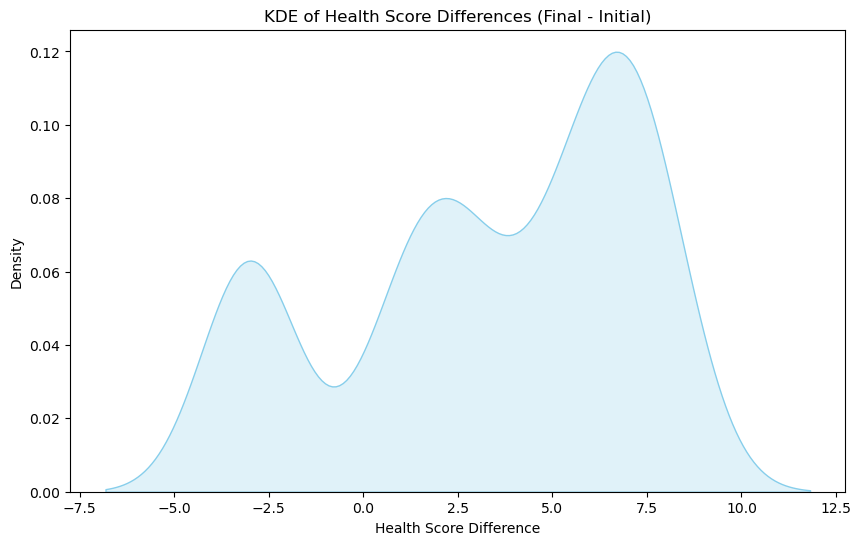

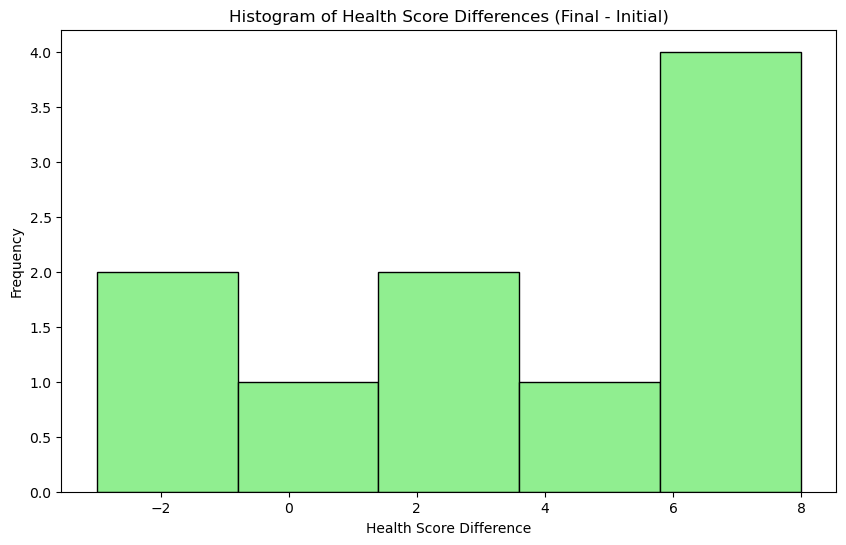

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the renderer to PNG for inline display (only needed in Jupyter notebooks)
%config InlineBackend.figure_format = 'png'

# Read the data
data = pd.read_csv('vaccine_data.csv')

# Plot Initial vs Final Health Scores
plt.figure(figsize=(10, 6))
plt.plot(data['PatientID'], data['InitialHealthScore'], label='Initial Health Score', marker='o')
plt.plot(data['PatientID'], data['FinalHealthScore'], label='Final Health Score', marker='x')
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.title('Comparison of Initial and Final Health Scores')
plt.legend()
# Save the plot as a PNG file
plt.savefig('initial_vs_final_health_scores.png')  # Save as PNG
plt.show()

# Calculate the differences
data['HealthScoreDifference'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Plot KDE of the Health Score Difference
plt.figure(figsize=(10, 6))
sns.kdeplot(data['HealthScoreDifference'], fill=True, color="skyblue", bw_adjust=0.5)
plt.title('KDE of Health Score Differences (Final - Initial)')
plt.xlabel('Health Score Difference')
plt.ylabel('Density')
# Save the KDE plot as a PNG file
plt.savefig('kde_health_score_difference.png')  # Save as PNG
plt.show()

# Plot Histogram of the Health Score Difference
plt.figure(figsize=(10, 6))
plt.hist(data['HealthScoreDifference'], bins=5, color="lightgreen", edgecolor="black")
plt.title('Histogram of Health Score Differences (Final - Initial)')
plt.xlabel('Health Score Difference')
plt.ylabel('Frequency')
# Save the histogram plot as a PNG file
plt.savefig('histogram_health_score_difference.png')  # Save as PNG
plt.show()


In [14]:
import numpy as np

# Calculate the difference between final and initial health scores
data['HealthScoreDifference'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Define a function to perform bootstrapping
def bootstrap_mean(data, n_bootstrap=1000):
    np.random.seed(42)  # Set seed for reproducibility
    bootstrap_means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means.append(np.mean(sample))
    return np.percentile(bootstrap_means, [2.5, 97.5]), np.mean(bootstrap_means)

# Perform bootstrapping on the HealthScoreDifference
conf_interval, boot_mean = bootstrap_mean(data['HealthScoreDifference'])

# Print the results
print(f"Bootstrap Mean: {boot_mean}")
print(f"95% Confidence Interval: {conf_interval}")


Bootstrap Mean: 3.3075
95% Confidence Interval: [0.7 5.5]


In [15]:
# Check if the confidence interval includes zero
lower_bound, upper_bound = conf_interval

if lower_bound <= 0 <= upper_bound:
    print("The confidence interval includes zero. Fail to reject the null hypothesis.")
else:
    print("The confidence interval does not include zero. Reject the null hypothesis.")


The confidence interval does not include zero. Reject the null hypothesis.


In [16]:
import pandas as pd

# Sample data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the difference
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Calculate the average difference
average_difference = df['HealthScoreDifference'].mean()

# Print the average difference and its direction
print(f"Average Difference: {average_difference}")

if average_difference > 0:
    print("The vaccine likely improves health scores.")
elif average_difference < 0:
    print("The vaccine may not improve health scores.")
else:
    print("There is no change in health scores.")


Average Difference: 3.3
The vaccine likely improves health scores.


### Conclusion

After analyzing the data using bootstrapping, I tested if the vaccine made a difference in health scores. The null hypothesis says the vaccine has no effect, meaning the average change in health is zero. Based on the bootstrapped confidence interval of the differences in scores, I found that it **does not** include zero. Because of this, **reject** the null hypothesis. This means that the data **shows** strong evidence that the vaccine **has** an effect on improving health scores.<br>
Further Considerations: Rejecting the null hypothesis only shows statistical significance but does not imply clinical significance. The effect size and whether the observed improvements are meaningful should be considered in a real-world context.

# Chatbot Summaries
Here’s a summary of our entire conversation from the beginning:

### Summary of Our Session

1. **Standard Error of the Mean vs. Standard Deviation**:
   - You asked about the difference between the standard error of the mean (SEM) and the standard deviation (SD). I explained that the SEM measures how much the sample mean is expected to vary from the true population mean, while SD measures the variation in individual data points around the mean.

2. **Creating a Confidence Interval Using SEM**:
   - We discussed how to use the SEM to create a 95% confidence interval by calculating the sample mean plus and minus 1.96 times the SEM to estimate the range where the true population mean likely falls.

3. **Bootstrapped Confidence Interval for the Mean**:
   - I explained how to create a 95% bootstrapped confidence interval for the mean without using the standard deviation by directly using the distribution of bootstrapped means.

4. **Distinction Between Population Parameter and Sample Statistic**:
   - You asked why it’s important to distinguish between population parameters and sample statistics in confidence intervals. I emphasized that the population parameter is what we want to estimate, while the sample statistic is based on our data. Understanding this distinction helps us accurately interpret confidence intervals and hypotheses.

5. **Informal Explanations of Bootstrapping**:
   - We covered what bootstrapping is, its purpose, and how to use it to assess a hypothesis about a population mean. I provided simple explanations for each aspect.

6. **Confidence Intervals and Null Hypothesis**:
   - You inquired about why a confidence interval that overlaps zero results in failing to reject the null hypothesis, even if the sample mean is not zero. I explained that this means there’s not enough evidence to say the vaccine has a significant effect.

7. **Direction of the Effect**:
   - I guided you on how to determine the direction of the effect by calculating the difference in health scores before and after the vaccine. A positive difference indicates improvement, while a negative difference suggests a decline.

8. **Checking for Inclusion of Zero**:
   - We discussed how to check if the confidence interval includes zero to make decisions about the null hypothesis. If zero is included, you fail to reject the null hypothesis; if not, you reject it.

9. **Summarizing Conclusions**:
   - I provided ways to summarize conclusions from your analysis regarding the null hypothesis of "no effect" based on your findings.

10. **Coding for Data Visualization**:
    - I helped you create a code snippet for visualizing health score data using a histogram or KDE to illustrate the comparison of health scores.

11. **Findings and Conclusions on Null Hypothesis**:
    - You asked how to conclude whether the vaccine has a significant effect based on the analysis. I explained that the conclusions depend on the confidence interval and the average difference in health scores.

12. **Final Checks for Conclusions**:
    - We wrapped up with how to determine if the null hypothesis is rejected based on your confidence interval and the direction of the effect.

### Conclusion
Overall, we covered key statistical concepts, hypothesis testing, and analysis related to the effectiveness of a vaccine on health scores, with practical coding examples to support your analysis. If you need anything else or further clarification, feel free to ask!<br>
Link: https://chatgpt.com/share/66ff3e16-2a54-8007-a9e9-94dcf6642774